In [5]:
import os
os.environ['KAGGLE_USERNAME'] = "godwinsamraj"
os.environ['KAGGLE_KEY'] = "8e9616edcd9c72a9033c54d0982046a1"

!kaggle datasets download -d phylake1337/fire-dataset

!unzip -q fire-dataset.zip -d fire_dataset


'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images and split into train and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'fire_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'fire_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Move into correct place
!mv fire_dataset/fire_dataset/* fire_dataset/

# Remove the extra folder
!rm -r fire_dataset/fire_dataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'fire_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'fire_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.8383 - loss: 0.4566

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 945ms/step - accuracy: 0.8403 - loss: 0.4507 - val_accuracy: 0.9146 - val_loss: 0.1819
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 908ms/step - accuracy: 0.9621 - loss: 0.1098 - val_accuracy: 0.9548 - val_loss: 0.1367
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 884ms/step - accuracy: 0.9800 - loss: 0.0685 - val_accuracy: 0.9347 - val_loss: 0.1761
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 906ms/step - accuracy: 0.9589 - loss: 0.1240 - val_accuracy: 0.9246 - val_loss: 0.1670
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 897ms/step - accuracy: 0.9740 - loss: 0.0748 - val_accuracy: 0.9045 - val_loss: 0.3269


In [ ]:
import os

# List all folders inside fire_dataset
print("Subfolders inside fire_dataset:")
print(os.listdir('fire_dataset'))



Subfolders inside fire_dataset:
['non_fire_images', 'fire_images']


In [ ]:
import os

# List a few fire images
fire_images = os.listdir('fire_dataset/fire_images')
print("Fire images:", fire_images[:5])


Fire images: ['fire.50.png', 'fire.7.png', 'fire.481.png', 'fire.488.png', 'fire.485.png']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Use the actual image name
img_path = 'fire_dataset/fire_images/fire.50.png'

# Load and preprocess
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("🔥 Fire Detected")
else:
    print("✅ No Fire Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
✅ No Fire Detected


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
import os


In [ ]:
# User menu
print("Choose input method:")
print("1 - Use image from dataset")
print("2 - Upload your own image")

choice = input("Enter 1 or 2: ")


Choose input method:
1 - Use image from dataset
2 - Upload your own image
Enter 1 or 2: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: ✅ No Fire Detected


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


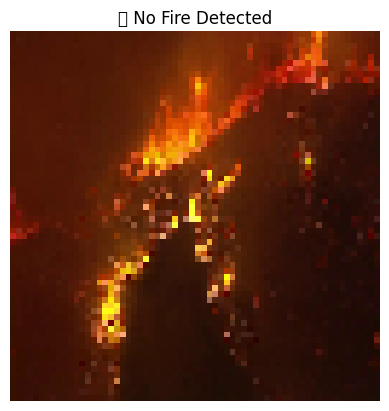

In [ ]:
if img_path:
    # Load, resize, normalize
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict using the trained model
    prediction = model.predict(img_array)

    # Show result
    result = "🔥 Fire Detected" if prediction[0][0] > 0.5 else "✅ No Fire Detected"
    print("Prediction:", result)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(result)
    plt.show()


Available sample images: ['fire.50.png', 'fire.7.png', 'fire.481.png', 'fire.488.png', 'fire.485.png']
Enter filename from above (e.g., fire.50.png): fire.7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: ✅ Fire Detected


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


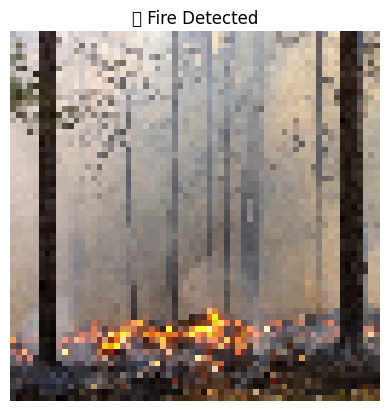

In [ ]:
if choice == "1":
    # Dataset image
    sample_images = os.listdir('fire_dataset/fire_images')
    print("Available sample images:", sample_images[:5])
    filename = input("Enter filename from above (e.g., fire.50.png): ")
    img_path = 'fire_dataset/fire_images/' + filename

elif choice == "2":
    # Upload image
    uploaded = files.upload()
    filename = next(iter(uploaded))  # get uploaded filename
    img_path = filename

else:
    print("❌ Invalid choice.")
    img_path = None
if img_path:
    # Load, resize, normalize
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict using the trained model
    prediction = model.predict(img_array)

    # Show result
    result = " no Fire Detected" if prediction[0][0] > 0.5 else "✅ Fire Detected"
    print("Prediction:", result)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(result)
    plt.show()